# Задача 1

Напишите программу реализующую решение системы линейных алгебраических урвнений на
основе LU -разложения. С ее помощью найдите решение системы `Ax = f`

In [1]:
import numpy as np

In [2]:
def createMatrix (n: int):
    M = np.zeros((n, n))
    for i in range (n):
        for j in range (n):
            if (i == j):
                M[i,j] = 1
            elif (i < j):
                M[i,j] = -1
            if (i == n-1):
                M[i,j] = 1
    return M

In [3]:
createMatrix(5)

array([[ 1., -1., -1., -1., -1.],
       [ 0.,  1., -1., -1., -1.],
       [ 0.,  0.,  1., -1., -1.],
       [ 0.,  0.,  0.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [4]:
def LUDecomposition(M):
    U = M.copy()
    n, m = U.shape[0], U.shape[1]
    L = np.diag(np.ones((n)))
    if (n != m):
        raise RuntimeError("Non-square matrices are not allowed")
    for It in range(n):
        for i in range(It+1, n):
            if (U[It,It] == 0):
                continue
            Coef = U[i,It]/U[It,It]
            L[i, It] = Coef
            for j in range(m):
                U[i,j] -= Coef * U[It,j]
    
    
    return L, U

In [5]:
a = createMatrix(5)
print(f"matrix A:\n{a}")
L, U = LUDecomposition(a)
print(f"matrix L:\n{L}")
print(f"matrix U:\n{U}")
print(f"L*U:\n {np.matmul(L,U)}")

matrix A:
[[ 1. -1. -1. -1. -1.]
 [ 0.  1. -1. -1. -1.]
 [ 0.  0.  1. -1. -1.]
 [ 0.  0.  0.  1. -1.]
 [ 1.  1.  1.  1.  1.]]
matrix L:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 2. 4. 8. 1.]]
matrix U:
[[ 1. -1. -1. -1. -1.]
 [ 0.  1. -1. -1. -1.]
 [ 0.  0.  1. -1. -1.]
 [ 0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. 16.]]
L*U:
 [[ 1. -1. -1. -1. -1.]
 [ 0.  1. -1. -1. -1.]
 [ 0.  0.  1. -1. -1.]
 [ 0.  0.  0.  1. -1.]
 [ 1.  1.  1.  1.  1.]]


In [6]:
def forwardSubstitution(M, b):
    Res = b.copy()
    for i in range(0, Res.size):
        for j in range (0, i):
            Res[i] -= Res[j] * M[i, j]
        Res[i] /= M[i,i]
    return Res

def backwardSubstitution(M, b):
    Res = b.copy()
    N = Res.size
    for i in range(N-1, 0-1, -1):
        for j in range (N-1, i, -1):
            Res[i] -= Res[j] * M[i, j]
        Res[i] /= M[i,i]
    return Res


def solveSystem (M, b):
    L, U = LUDecomposition(M)
    z = forwardSubstitution(L, b)
    return backwardSubstitution(U, z)

In [7]:
A = createMatrix(10)
b = np.array([1 for _ in range(10)], dtype=float)
print (f"A =\n{A}\nb = {b}")
print("Solution: ", solveSystem(A, b))

A =
[[ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
b = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Solution:  [ 1.          0.5         0.25        0.125       0.0625      0.03125
  0.015625    0.0078125   0.00390625 -0.99609375]


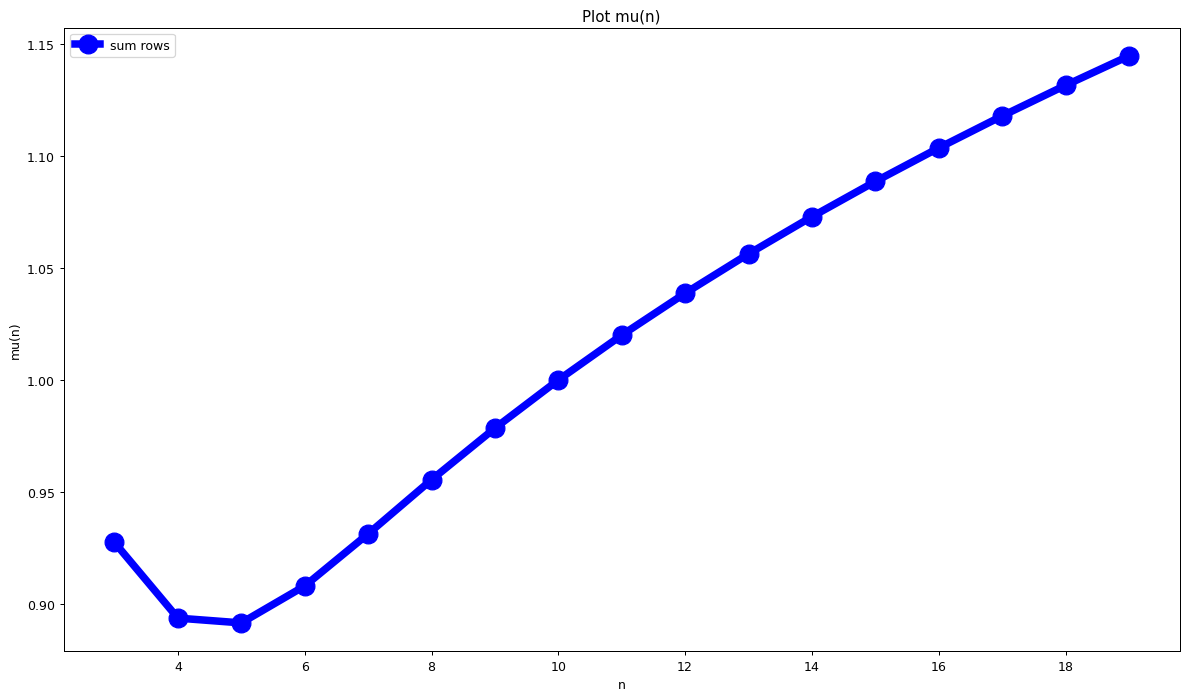

In [8]:
def getEigs(M):
    Eigs, _ = np.linalg.eig(M)
    return Eigs

def normEig(M):
    return max(abs(getEigs(M*np.transpose(M))))**0.5

def findMu(M):
    return normEig(M) * normEig(np.linalg.inv(M))

Ns = [i for i in range(3, 20)]
Mus = [findMu(createMatrix(N)) for N in range(3, 20)]

import matplotlib.pyplot as plt

plt.figure(figsize=(16,9), dpi=90)
plt.title("Plot mu(n)")
plt.xlabel("n")
plt.ylabel("mu(n)")
plt.plot(Ns, Mus, '-o', markersize=15, label="sum rows", linewidth=6, color="blue")
plt.legend()
plt.show()


# Задача 2

In [9]:
import numpy as np                                                                                          
                                                                                                              
                                                                                                              
def createMatrix2():                                                                                                                                                                                
    return np.matrix([[0.78, 0.563],[0.457, 0.33]])                                                                                      
                                                                                                              
def getEigs(M):
    Eigs, _ = np.linalg.eig(M)
    return Eigs

def normEig(M):
    return max(abs(getEigs(M*np.transpose(M))))**0.5

def findMu(M):
    return normEig(M) * normEig(np.linalg.inv(M))                                                                                 
                                                                                                   
                                                                                                              
def nextIteration(A, Xk, f):                                                                                    
    Xk1 = (np.eye(2) - np.matrix(A)) * Xk + f                                                                 
    return Xk1                                                                                                
                                                                                                              
def solveIterative(f, Eps):                                                                                   
    A = createMatrix2()                                                                                              
    Xk = np.matrix('1; 1')                                                                                    
    Xk1 = nextIteration(A, Xk, f)                                                                                  
    while (np.linalg.norm((Xk1 - Xk), ord=2) > Eps):                                                                
        Xk = Xk1                                                                                              
        Xk1 = nextIteration(A, Xk, f)                                                                              
    return Xk1           

Epsilon = 1e-6                                                                                                
X0 = np.matrix('1; -1')                                                                                       
NormX0 = np.linalg.norm(X0, ord=2)                                                                                      
Mu = findMu(createMatrix2())                                                                                                                                                                                 
                                                                                                              
f0 = np.matrix('0.217; 0.127')                                                                                
NormF0 = np.linalg.norm(f0, ord=2)                                                                                      
df1 = np.matrix('0; 0.0005')                                                                                  
df2 = np.matrix('0.0001; 0')                                                                                  
df3 = np.matrix('0.001; 0.0006')                                                                              
F = [f0, f0 + df1, f0 + df2, f0 + df3]                                                                        
                                                                                                              
for i in range(1, 4):                                                                                         
    X = solveIterative(F[i], Epsilon)                                                                            
    dX = np.linalg.norm(X - X0, ord=2)                                                                                  
    print(f"Case {i}:\nEquation system:\nSolution:\n{X}\n||X - X0|| = {dX}")
    print(f"Inequality: {dX / NormX0} <= {Mu * np.linalg.norm(F[i] - f0, ord=2) / NormF0}\n")


Case 1:
Equation system:
Solution:
[[-1.57660948]
 [ 2.56972643]]
||X - X0|| = 4.402483758010683
Inequality: 3.1130261193529893 <= 22.67960476841215

Case 2:
Equation system:
Solution:
[[ 1.29679317]
 [-1.41101111]]
||X - X0|| = 0.5069677722618177
Inequality: 0.35848034960936853 <= 4.535920953681926

Case 3:
Equation system:
Solution:
[[ 0.92248118]
 [-0.89082755]]
||X - X0|| = 0.13389470407297063
Inequality: 0.09467785321496357 <= 52.89747375948587



# Задача 3

In [10]:
def createMatrix3(N, a):
    M = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if (i == j):
                M[i,j] = 2
            elif (j == i+1):
                M[i,j] = -1 - a
            elif (j == i-1):
                M[i,j] = -1 + a
    return M
def createInhomogeneity3 (N, a):
    f = np.zeros((N, 1))
    f[0] = 1 - a
    f[N-1] = 1 + a
    return f
    
print(createMatrix3(4, 0.1))
print(createInhomogeneity3(4, 0.1))

[[ 2.  -1.1  0.   0. ]
 [-0.9  2.  -1.1  0. ]
 [ 0.  -0.9  2.  -1.1]
 [ 0.   0.  -0.9  2. ]]
[[0.9]
 [0. ]
 [0. ]
 [1.1]]


In [11]:
def decomposeLDU(M):
    n, m = M.shape[0], M.shape[1]
    if (n != m):
        raise RuntimeError("Non-square matrices are not allowed")
    L,D,U = np.zeros((n,m)), np.zeros((n,m)), np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if (i == j):
                D[i,j] = M[i,j]
            elif (i < j):
                U[i,j] = M[i,j]
            else:
                L[i,j] = M[i,j]
    return L, D, U

decomposeLDU(np.ones((4, 4)))
    

(array([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[0., 1., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]]))

In [12]:
def nextIteration3(InvM, f, U, Xk):
    return np.matrix(InvM)* np.matrix(f - np.dot(U, Xk))

def solveZeidel(M, f, Accuracy):
    n = M.shape[0]
    L, D, U = decomposeLDU(M)
    Cnt = 0
    LDInv = np.linalg.inv(L+D)
    Curr = np.zeros((n, 1))
    Next = nextIteration3(LDInv, f, U, Curr)
    while (np.linalg.norm(Next-Curr, ord=2) > Accuracy):
        Cnt += 1
        Curr = Next
        Next = nextIteration3(LDInv, f, U, Curr)
    return np.transpose(Next), Cnt

N = 15
a = 0.1
Accuracy = 1e-6

M = createMatrix3(N, a)
f = createInhomogeneity3(N, a)
X, Cnt = solveZeidel(M, f, Accuracy)

print(f"Equation system:\nN ={N}, a = {a}\nM: \n{M}\nf: \n{f}")
print(f"Solution:\n{X}\n Iteration number: {Cnt}")       

Equation system:
N =15, a = 0.1
M: 
[[ 2.  -1.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [-0.9  2.  -1.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.  -0.9  2.  -1.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.  -0.9  2.  -1.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.  -0.9  2.  -1.1  0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.  -0.9  2.  -1.1  0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.  -0.9  2.  -1.1  0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.9  2.  -1.1  0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.9  2.  -1.1  0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.9  2.  -1.1  0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.9  2.  -1.1  0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.9  2.  -1.1  0.
   0. ]
 [ 0.   0.   0. 

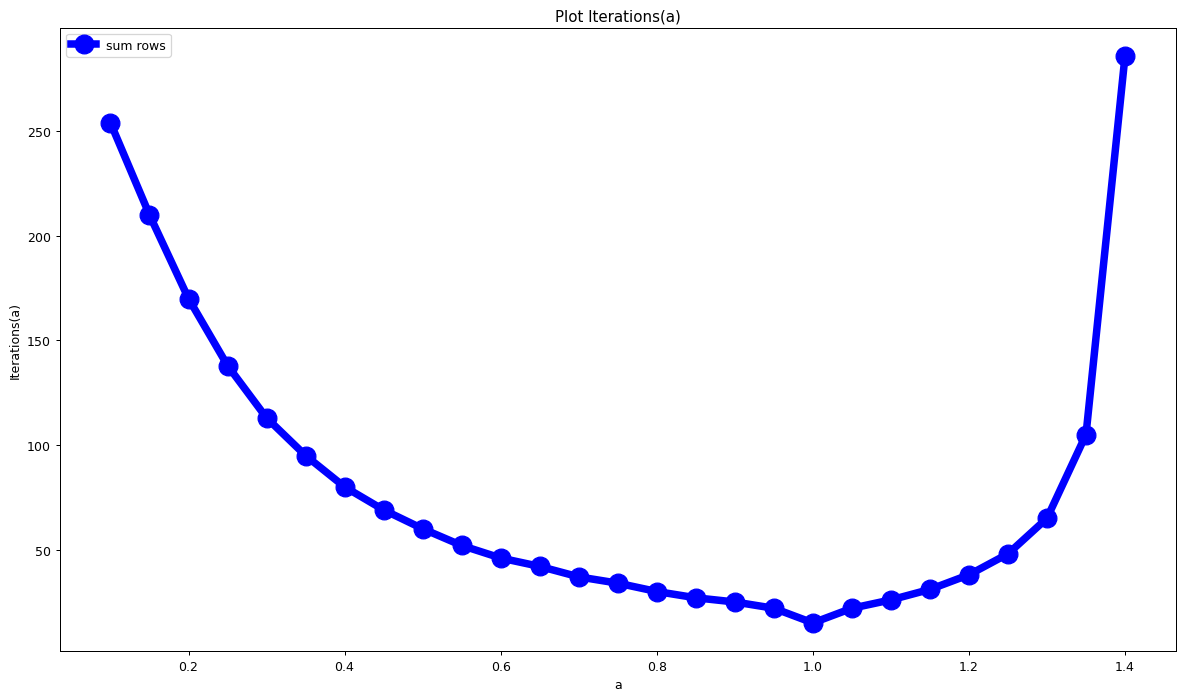

In [13]:

As = [a for a in np.arange (0.1, 1.45, 0.05)]
Iterations = [solveZeidel(createMatrix3(N,a), createInhomogeneity3(N,a), Accuracy)[-1] for a in As]

import matplotlib.pyplot as plt

plt.figure(figsize=(16,9), dpi=90)
plt.title("Plot Iterations(a)")
plt.xlabel("a")
plt.ylabel("Iterations(a)")
plt.plot(As, Iterations, '-o', markersize=15, label="sum rows", linewidth=6, color="blue")
plt.legend()
plt.show()